In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Display options (optional)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)


In [4]:
# 3. Load the returns matrix saved in Part 2
file_path = "results_csv/returns_matrix.csv"   # Adjust if needed

returns_df = pd.read_csv(file_path, parse_dates=["date"], index_col="date")

print("Shape of returns_df:", returns_df.shape)
print("Columns:", returns_df.columns.tolist())
returns_df.head()


Shape of returns_df: (1741, 41)
Columns: ['CAC40', 'ACCP', 'AIRP', 'AIR', 'AXAF', 'BNPP', 'BOUY', 'BVI', 'CAGR', 'CAPP', 'CARR', 'DANO', 'DAST', 'EDEN', 'ENGIE', 'ESLX', 'EUFI', 'HRMS', 'LEGD', 'LVMH', 'MICP', 'MT', 'ORAN', 'OREP', 'PERP', 'PRTP', 'PUBP', 'RENA', 'SAF', 'SASY', 'SCHN', 'SGEF', 'SGOB', 'SOGN', 'STLA', 'STMPA', 'TCFP', 'TEPRF', 'TTEF', 'URW', 'VIE']


CAC40      ACCP      AIRP       AIR      AXAF      BNPP      BOUY       BVI      CAGR      CAPP  \
date                                                                                                             
2018-12-27 -0.006005 -0.016022 -0.018195  0.005793 -0.012254 -0.006187 -0.021029 -0.013211 -0.012917  0.006177   
2018-12-28  0.017425  0.023021  0.013328  0.020221  0.012945  0.021530  0.024124  0.012224  0.026172  0.014404   
2018-12-31  0.011103  0.018386  0.020669  0.002402  0.004260  0.002539  0.011294  0.023577  0.002125  0.010242   
2019-01-02 -0.008730 -0.013743 -0.021723  0.002516 -0.002651 -0.009878 -0.028717 -0.016854 -0.012725 -0.029263   
2019-01-03 -0.016612 -0.016393 -0.018316 -0.035262 -0.008506 -0.006140 -0.009198 -0.028571 -0.003222 -0.052931   

                CARR      DANO      DAST      EDEN     ENGIE      ESLX      EUFI      HRMS      LEGD      LVMH  \
date                                                                                                             
2018-12-27 -0.000345 -0.021746  0.009027 -0.032639 -0.021758 -0.007752 -0.007609  0.012513 -0.007020  0.008158   
2018-12-28  0.022061  0.006470  0.012425  0.020566  0.021352  0.008732  0.017252  0.015981  0.024745  0.022658   
2018-12-31  0.005734  0.013845  0.018164  0.011020  0.020906  0.006378  0.023869  0.016779  0.000406  0.021563   
2019-01-02 -0.015426 -0.007641 -0.008197 -0.007474  0.000853  0.002263  0.004294 -0.014851 -0.007302 -0.018978   
2019-01-03  0.019414  0.000819 -0.063685  0.007844  0.000000 -0.009485 -0.037874 -0.028476 -0.017777 -0.038097   

                MICP        MT      ORAN      OREP      PERP      PRTP      PUBP      RENA       SAF      SASY  \
date                                                                                                             
2018-12-27 -0.025305 -0.009460 -0.011339 -0.010372 -0.012707 -0.003876 -0.011513 -0.022222 -0.008858 -0.006364   
2018-12-28  0.017308  0.010674  0.009319  0.012781  0.011083  0.031128  0.024334  0.006520  0.023833  0.019760   
2018-12-31  0.024575  0.008338  0.004972  0.015649  0.013437  0.035472  0.016853  0.009624  0.022308  0.005880   
2019-01-02 -0.013376 -0.024256 -0.003534 -0.007952 -0.014655 -0.021380 -0.010783 -0.029698 -0.018501 -0.003454   
2019-01-03 -0.015895 -0.021469  0.005674 -0.012024 -0.015935 -0.054866 -0.016956 -0.006235 -0.022716 -0.009865   

                SCHN      SGEF      SGOB      SOGN      STLA     STMPA      TCFP     TEPRF      TTEF       URW  \
date                                                                                                             
2018-12-27  0.004139  0.001986 -0.007752 -0.014488 -0.003835  0.001688  0.000807  0.008962  0.002653 -0.015906   
2018-12-28  0.018894  0.018686  0.029830  0.021683  0.008662  0.030329  0.015924  0.021466  0.016318  0.006495   
2018-12-31  0.006743  0.000834  0.005517  0.000719  0.020992  0.020442  0.011905  0.011594  0.001953  0.016059   
2019-01-02 -0.008372 -0.008053 -0.013032 -0.014019 -0.028037 -0.027244 -0.002941 -0.007880  0.010394 -0.020532   
2019-01-03 -0.027693 -0.003359 -0.008687  0.000365 -0.005769 -0.116145 -0.024385 -0.033935 -0.008573  0.005127   

                 VIE  
date                  
2018-12-27 -0.027666  
2018-12-28  0.015412  
2018-12-31  0.010508  
2019-01-02 -0.008666  
2019-01-03 -0.006993

In [5]:
# 4. Split market (CAC40) and stock returns

market_col = "CAC40"          # index column name
market_ret = returns_df[market_col]        # Series: market returns
stock_returns = returns_df.drop(columns=[market_col])  # DataFrame: stocks only

print("Market series length:", len(market_ret))
print("Stock returns shape:", stock_returns.shape)
stock_returns.head()


Market series length: 1741
Stock returns shape: (1741, 40)


ACCP      AIRP       AIR      AXAF      BNPP      BOUY       BVI      CAGR      CAPP      CARR  \
date                                                                                                             
2018-12-27 -0.016022 -0.018195  0.005793 -0.012254 -0.006187 -0.021029 -0.013211 -0.012917  0.006177 -0.000345   
2018-12-28  0.023021  0.013328  0.020221  0.012945  0.021530  0.024124  0.012224  0.026172  0.014404  0.022061   
2018-12-31  0.018386  0.020669  0.002402  0.004260  0.002539  0.011294  0.023577  0.002125  0.010242  0.005734   
2019-01-02 -0.013743 -0.021723  0.002516 -0.002651 -0.009878 -0.028717 -0.016854 -0.012725 -0.029263 -0.015426   
2019-01-03 -0.016393 -0.018316 -0.035262 -0.008506 -0.006140 -0.009198 -0.028571 -0.003222 -0.052931  0.019414   

                DANO      DAST      EDEN     ENGIE      ESLX      EUFI      HRMS      LEGD      LVMH      MICP  \
date                                                                                                             
2018-12-27 -0.021746  0.009027 -0.032639 -0.021758 -0.007752 -0.007609  0.012513 -0.007020  0.008158 -0.025305   
2018-12-28  0.006470  0.012425  0.020566  0.021352  0.008732  0.017252  0.015981  0.024745  0.022658  0.017308   
2018-12-31  0.013845  0.018164  0.011020  0.020906  0.006378  0.023869  0.016779  0.000406  0.021563  0.024575   
2019-01-02 -0.007641 -0.008197 -0.007474  0.000853  0.002263  0.004294 -0.014851 -0.007302 -0.018978 -0.013376   
2019-01-03  0.000819 -0.063685  0.007844  0.000000 -0.009485 -0.037874 -0.028476 -0.017777 -0.038097 -0.015895   

                  MT      ORAN      OREP      PERP      PRTP      PUBP      RENA       SAF      SASY      SCHN  \
date                                                                                                             
2018-12-27 -0.009460 -0.011339 -0.010372 -0.012707 -0.003876 -0.011513 -0.022222 -0.008858 -0.006364  0.004139   
2018-12-28  0.010674  0.009319  0.012781  0.011083  0.031128  0.024334  0.006520  0.023833  0.019760  0.018894   
2018-12-31  0.008338  0.004972  0.015649  0.013437  0.035472  0.016853  0.009624  0.022308  0.005880  0.006743   
2019-01-02 -0.024256 -0.003534 -0.007952 -0.014655 -0.021380 -0.010783 -0.029698 -0.018501 -0.003454 -0.008372   
2019-01-03 -0.021469  0.005674 -0.012024 -0.015935 -0.054866 -0.016956 -0.006235 -0.022716 -0.009865 -0.027693   

                SGEF      SGOB      SOGN      STLA     STMPA      TCFP     TEPRF      TTEF       URW       VIE  
date                                                                                                            
2018-12-27  0.001986 -0.007752 -0.014488 -0.003835  0.001688  0.000807  0.008962  0.002653 -0.015906 -0.027666  
2018-12-28  0.018686  0.029830  0.021683  0.008662  0.030329  0.015924  0.021466  0.016318  0.006495  0.015412  
2018-12-31  0.000834  0.005517  0.000719  0.020992  0.020442  0.011905  0.011594  0.001953  0.016059  0.010508  
2019-01-02 -0.008053 -0.013032 -0.014019 -0.028037 -0.027244 -0.002941 -0.007880  0.010394 -0.020532 -0.008666  
2019-01-03 -0.003359 -0.008687  0.000365 -0.005769 -0.116145 -0.024385 -0.033935 -0.008573  0.005127 -0.006993

In [6]:
# 5. Market factor: simply CAC40 daily returns
# Optionally de-mean it if needed later for regressions

market_factor = market_ret.copy()
market_factor.name = "MKT"

market_factor.head()


date
2018-12-27   -0.006005
2018-12-28    0.017425
2018-12-31    0.011103
2019-01-02   -0.008730
2019-01-03   -0.016612
Name: MKT, dtype: float64

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 6. Standardize stock returns (column-wise)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(stock_returns)   # shape: (n_dates, n_stocks)

# 7. Fit PCA on standardized stock returns
pca = PCA()
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_
print("Explained variance ratio by component:")
print(explained_var)


Explained variance ratio by component:
[0.43020524 0.06707951 0.04571989 0.03135842 0.03051344 0.02275129
 0.02146371 0.0201003  0.01887091 0.01843393 0.01749289 0.01619513
 0.01588252 0.01529679 0.01473913 0.01408194 0.01326799 0.01267315
 0.01182866 0.01170822 0.01150568 0.01095382 0.01074216 0.01027412
 0.00992046 0.00935285 0.00899692 0.00868746 0.00840163 0.00780908
 0.00722797 0.00699374 0.00671728 0.00663889 0.00546528 0.00482409
 0.00437355 0.00405017 0.00399945 0.00340235]


In [8]:
# 8. Compute PCA scores (factor returns for each date)
pca_scores = pca.transform(X_scaled)   # shape: (n_dates, n_components)

# Keep first 2 components as factors
pca_factors = pd.DataFrame(
    pca_scores[:, :2],                 # first 2 PCs
    index=stock_returns.index,        # same dates
    columns=["PC1_factor", "PC2_factor"]
)

pca_factors.head()


PC1_factor  PC2_factor
date                              
2018-12-27   -3.104630    0.949008
2018-12-28    5.771562    0.430017
2018-12-31    3.934090    1.677036
2019-01-02   -4.160432   -0.773597
2019-01-03   -5.984695   -4.800992

In [9]:
# 9. Build a unified factor DataFrame: Market + PCA factors

factors_df = pd.concat(
    [market_factor, pca_factors],
    axis=1
)

factors_df.head()


MKT  PC1_factor  PC2_factor
date                                        
2018-12-27 -0.006005   -3.104630    0.949008
2018-12-28  0.017425    5.771562    0.430017
2018-12-31  0.011103    3.934090    1.677036
2019-01-02 -0.008730   -4.160432   -0.773597
2019-01-03 -0.016612   -5.984695   -4.800992

In [10]:
import statsmodels.api as sm

# Example stock (you can change it)
example_stock = stock_returns.columns[0]    # first stock in your list
y = stock_returns[example_stock]            # dependent variable
X = factors_df                              # independent variables

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit regression: stock = alpha + b1*MKT + b2*PC1 + b3*PC2 + error
model = sm.OLS(y, X_with_const).fit()

print("=== Factor Regression for:", example_stock, "===")
print(model.summary())


=== Factor Regression for: ACCP ===
                            OLS Regression Results                            
Dep. Variable:                   ACCP   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     787.6
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          2.96e-323
Time:                        20:46:23   Log-Likelihood:                 4933.0
No. Observations:                1741   AIC:                            -9858.
Df Residuals:                    1737   BIC:                            -9836.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

In [11]:
# Prepare results containers
results = {
    "alpha": [],
    "beta_MKT": [],
    "beta_PC1": [],
    "beta_PC2": [],
    "r2": [],
    "residual_vol": []
}

tickers = stock_returns.columns

for ticker in tickers:
    y = stock_returns[ticker]
    X = factors_df
    X_with_const = sm.add_constant(X)

    model = sm.OLS(y, X_with_const).fit()

    # Store results
    results["alpha"].append(model.params["const"])
    results["beta_MKT"].append(model.params["MKT"])
    results["beta_PC1"].append(model.params["PC1_factor"])
    results["beta_PC2"].append(model.params["PC2_factor"])
    results["r2"].append(model.rsquared)
    results["residual_vol"].append(np.std(model.resid))

# Build results DataFrame
factor_loadings = pd.DataFrame(results, index=tickers)

factor_loadings.head()


alpha  beta_MKT  beta_PC1  beta_PC2        r2  residual_vol
ACCP  0.000586 -0.738326  0.005958 -0.002074  0.576306      0.014230
AIRP  0.000296  0.590296  0.000507  0.001487  0.562256      0.008537
AIR   0.000339  1.259105  0.000713 -0.003515  0.597558      0.015239
AXAF  0.000355  0.565076  0.001585 -0.002603  0.699836      0.009040
BNPP  0.000344  0.685231  0.002095 -0.004544  0.745081      0.010610

In [12]:
factor_loadings.to_csv("results_csv/factor_loadings.csv")
print("Saved: factor_loadings.csv")


Saved: factor_loadings.csv


In [13]:
# 11. Factor and specific risk components

# A) Factor covariance matrix Σ_F (3x3 for MKT, PC1, PC2)
factor_cov = factors_df.cov()   # DataFrame
print("Factor covariance matrix Σ_F:")
display(factor_cov)

# B) Factor loadings matrix B (n_stocks x 3)
B = factor_loadings[["beta_MKT", "beta_PC1", "beta_PC2"]]
print("\nFirst rows of factor loadings B:")
display(B.head())

# C) Specific (idiosyncratic) variance for each stock (diagonal of D)
spec_var = factor_loadings["residual_vol"] ** 2
print("\nFirst residual variances:")
display(spec_var.head())


Factor covariance matrix Σ_F:


MKT    PC1_factor    PC2_factor
MKT         0.000146  4.909786e-02  1.790972e-03
PC1_factor  0.049098  1.721810e+01 -1.364936e-15
PC2_factor  0.001791 -1.364936e-15  2.684722e+00


First rows of factor loadings B:


beta_MKT  beta_PC1  beta_PC2
ACCP -0.738326  0.005958 -0.002074
AIRP  0.590296  0.000507  0.001487
AIR   1.259105  0.000713 -0.003515
AXAF  0.565076  0.001585 -0.002603
BNPP  0.685231  0.002095 -0.004544


First residual variances:


ACCP    0.000203
AIRP    0.000073
AIR     0.000232
AXAF    0.000082
BNPP    0.000113
Name: residual_vol, dtype: float64

In [14]:
# 12. Build model covariance matrix Σ_model = B Σ_F B' + D

# Convert to NumPy for matrix operations
F_cov = factor_cov.values                 # (3 x 3)
B_mat = B.values                          # (n_stocks x 3)

# Factor part: B Σ_F B'
Sigma_factor = B_mat @ F_cov @ B_mat.T    # (n_stocks x n_stocks)

# Specific risk matrix D (diagonal)
D_mat = np.diag(spec_var.values)          # (n_stocks x n_stocks)

# Total model covariance
Sigma_model = Sigma_factor + D_mat        # (n_stocks x n_stocks)

# Put back into DataFrame with tickers as index/columns
tickers = B.index
Sigma_model_df = pd.DataFrame(Sigma_model, index=tickers, columns=tickers)

print("Shape of Σ_model:", Sigma_model_df.shape)
Sigma_model_df.iloc[:5, :5]


Shape of Σ_model: (40, 40)


ACCP      AIRP       AIR      AXAF      BNPP
ACCP  0.000478  0.000130  0.000300  0.000226  0.000295
AIRP  0.000130  0.000167  0.000152  0.000111  0.000134
AIR   0.000300  0.000152  0.000577  0.000256  0.000333
AXAF  0.000226  0.000111  0.000256  0.000272  0.000249
BNPP  0.000295  0.000134  0.000333  0.000249  0.000442

In [15]:
# Optional: empirical covariance from returns
emp_cov_df = stock_returns.cov()
emp_cov_df.iloc[:5, :5]


ACCP      AIRP       AIR      AXAF      BNPP
ACCP  0.000478  0.000110  0.000350  0.000211  0.000282
AIRP  0.000110  0.000167  0.000135  0.000114  0.000124
AIR   0.000350  0.000135  0.000577  0.000231  0.000306
AXAF  0.000211  0.000114  0.000231  0.000272  0.000253
BNPP  0.000282  0.000124  0.000306  0.000253  0.000442

In [16]:
# 13. Equal-weight portfolio across all stocks

n = len(tickers)
w = np.ones(n) / n   # equal weights

print("Number of stocks:", n)
print("First 5 weights:", w[:5])


Number of stocks: 40
First 5 weights: [0.025 0.025 0.025 0.025 0.025]


In [19]:
# 14. Portfolio risk decomposition (fixed scalar extraction)

# Convert to NumPy
w_vec = w.reshape(-1, 1)   # (n x 1)

# Total variance from model covariance
total_var = (w_vec.T @ Sigma_model @ w_vec)[0, 0]

# Factor-only covariance (B Σ_F B')
Sigma_factor_only = Sigma_factor
factor_var = (w_vec.T @ Sigma_factor_only @ w_vec)[0, 0]

# Specific (idiosyncratic) variance (D)
spec_var_port = (w_vec.T @ D_mat @ w_vec)[0, 0]

# Check: total_var ≈ factor_var + spec_var_port
print("Total variance (model):", total_var)
print("Factor variance:", factor_var)
print("Specific (idiosyncratic) variance:", spec_var_port)
print("Check (factor + specific):", factor_var + spec_var_port)


Total variance (model): 0.00016047777468162388
Factor variance: 0.00015588995589477348
Specific (idiosyncratic) variance: 4.5878187868504555e-06
Check (factor + specific): 0.00016047777468162393


In [20]:
# 14b. Contribution of each factor to portfolio variance

# Portfolio exposures to each factor: b_p = w' B  (1 x 3)
b_p = w_vec.T @ B_mat    # (1 x 3)

# Factor variance contribution: b_p Σ_F b_p'
factor_cov_mat = F_cov   # (3 x 3)
factor_contrib = b_p @ factor_cov_mat @ b_p.T   # scalar total

# Individual factor contributions:
# We approximate by isolating each factor: e_i Σ_F e_i' scaled by exposure
factor_names = ["MKT", "PC1_factor", "PC2_factor"]
factor_var_contrib = {}

for i, name in enumerate(factor_names):
    e = np.zeros((3, 1))
    e[i, 0] = 1.0
    
    # variance from factor i alone: (b_p e)^2 * Var(F_i)
    # More robust: project through Σ_F
    # var_i = (b_p @ Σ_F @ e)^2 / (e.T @ Σ_F @ e)  – but that's more complex.
    # Simpler approximation: exposure^2 * Var(F_i)
    var_i = float((b_p[0, i] ** 2) * factor_cov_mat[i, i])
    factor_var_contrib[name] = var_i

# Normalize contributions and print
print("\n=== Portfolio Risk Decomposition (Approximate by Factor) ===")
for name, v in factor_var_contrib.items():
    pct = v / total_var * 100 if total_var > 0 else np.nan
    print(f"{name}: variance={v:.8f}, contribution={pct:.2f}%")

spec_pct = spec_var_port / total_var * 100 if total_var > 0 else np.nan
print(f"Specific risk: variance={spec_var_port:.8f}, contribution={spec_pct:.2f}%")



=== Portfolio Risk Decomposition (Approximate by Factor) ===
MKT: variance=0.00000147, contribution=0.92%
PC1_factor: variance=0.00018699, contribution=116.52%
PC2_factor: variance=0.00000001, contribution=0.01%
Specific risk: variance=0.00000459, contribution=2.86%


In [21]:
# Σ = model covariance matrix from the factor model
Sigma = Sigma_model_df.values               # (n x n)
tickers = Sigma_model_df.index             # stock names
n = len(tickers)

# 1. Vector of ones
ones = np.ones((n, 1))

# 2. Compute inverse of the covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# 3. MVP formula: w = Σ^{-1} 1 / (1' Σ^{-1} 1)
numerator = Sigma_inv @ ones
denominator = ones.T @ Sigma_inv @ ones
w_mvp = numerator / denominator

# Convert to a clean DataFrame
mvp_weights = pd.DataFrame(w_mvp, index=tickers, columns=["MVP_weight"])

print("=== Minimum Variance Portfolio (weights sum to 1) ===")
display(mvp_weights)

print("\nSum of weights:", mvp_weights["MVP_weight"].sum())


=== Minimum Variance Portfolio (weights sum to 1) ===


MVP_weight
ACCP    -0.020808
AIRP     0.132389
AIR     -0.044109
AXAF     0.035667
BNPP    -0.044695
BOUY     0.052868
BVI      0.082385
CAGR    -0.003499
CAPP    -0.014170
CARR     0.105414
DANO     0.177084
DAST     0.032847
EDEN     0.034693
ENGIE    0.093773
ESLX     0.029662
EUFI     0.036989
HRMS     0.004101
LEGD     0.032556
LVMH    -0.073992
MICP     0.028633
MT      -0.042021
ORAN     0.254162
OREP     0.064850
PERP     0.093616
PRTP    -0.040626
PUBP     0.017314
RENA    -0.033606
SAF     -0.047591
SASY     0.140461
SCHN    -0.039149
SGEF    -0.011235
SGOB    -0.050070
SOGN    -0.058534
STLA    -0.046594
STMPA   -0.036808
TCFP     0.063537
TEPRF    0.011111
TTEF     0.065326
URW     -0.012823
VIE      0.030889


Sum of weights: 1.0000000000000002


In [22]:
# ============================================================
# RISK DECOMPOSITION OF THE MINIMUM VARIANCE PORTFOLIO
# ============================================================

# MVP weights as NumPy
w_mvp_vec = mvp_weights["MVP_weight"].values.reshape(-1, 1)

# Total variance of MVP
mvp_total_var = (w_mvp_vec.T @ Sigma_model @ w_mvp_vec)[0, 0]
mvp_total_vol = np.sqrt(mvp_total_var)

print("=== MVP Total Risk ===")
print("Variance:", mvp_total_var)
print("Volatility:", mvp_total_vol)
print()

# ------------------------------------------------------------
# Factor Risk Contribution
# ------------------------------------------------------------

# Portfolio exposures to each factor: b_p = w' B
b_p = (w_mvp_vec.T @ B_mat)[0]    # shape (3,)

print("Portfolio exposures to factors (b_p):")
for name, val in zip(["MKT", "PC1", "PC2"], b_p):
    print(f"{name}: {val}")
print()

# Factor covariance matrix
F_cov = factor_cov.values

# Variance explained by factors
mvp_factor_var = (b_p @ F_cov @ b_p.T)

# Specific variance
mvp_spec_var = (w_mvp_vec.T @ D_mat @ w_mvp_vec)[0, 0]

print("=== Variance Breakdown ===")
print("Factor variance:", mvp_factor_var)
print("Specific variance:", mvp_spec_var)
print("Check (factor + specific):", mvp_factor_var + mvp_spec_var)
print()

# ------------------------------------------------------------
# Contribution by individual factor
# ------------------------------------------------------------

factor_names = ["MKT", "PC1", "PC2"]
factor_contrib = {}

for i, name in enumerate(factor_names):
    var_i = (b_p[i] ** 2) * F_cov[i, i]
    factor_contrib[name] = var_i

print("=== Individual Factor Contributions ===")
for name, v in factor_contrib.items():
    pct = v / mvp_total_var * 100
    print(f"{name}: variance={v:.10f}, contribution={pct:.2f}%")

spec_pct = mvp_spec_var / mvp_total_var * 100
print(f"Specific risk: variance={mvp_spec_var:.10f}, contribution={spec_pct:.2f}%")


=== MVP Total Risk ===
Variance: 3.920425334281088e-05
Volatility: 0.006261329997916647

Portfolio exposures to factors (b_p):
MKT: 0.07512406244442787
PC1: 0.00049651885551628
PC2: 0.00045511086850910155

=== Variance Breakdown ===
Factor variance: 9.407776097804478e-06
Specific variance: 2.9796477245006396e-05
Check (factor + specific): 3.9204253342810874e-05

=== Individual Factor Contributions ===
MKT: variance=0.0000008217, contribution=2.10%
PC1: variance=0.0000042448, contribution=10.83%
PC2: variance=0.0000005561, contribution=1.42%
Specific risk: variance=0.0000297965, contribution=76.00%


MVP weights sum: 1.0000000000000002
Tangency weights sum: 1.0000000000000009


C:\Users\rezgu\AppData\Local\Temp\ipykernel_16296\3493896847.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  port_ret = float(w.T @ mu)
C:\Users\rezgu\AppData\Local\Temp\ipykernel_16296\3493896847.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  port_var = float(w.T @ Sigma @ w)


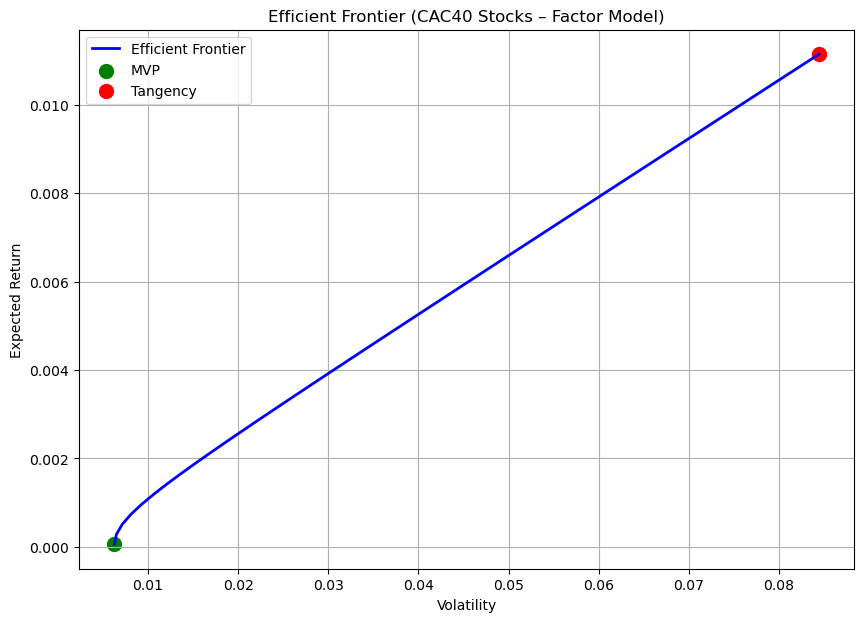

In [24]:
# ============================================================
# EFFICIENT FRONTIER — FACTOR MODEL (CAC40)
# ============================================================

# STEP 1 — Expected returns from historical means
expected_returns = stock_returns.mean()
expected_returns.name = "mu"
mu = expected_returns.values.reshape(-1, 1)

# STEP 2 — Prepare matrices
Sigma = Sigma_model_df.values
ones = np.ones((len(mu), 1))
Sigma_inv = np.linalg.inv(Sigma)

# STEP 3 — Compute MVP and Tangency Portfolio
w_mvp = Sigma_inv @ ones / (ones.T @ Sigma_inv @ ones)
w_mvp = w_mvp / w_mvp.sum()

top = Sigma_inv @ mu
w_tan = top / (ones.T @ top)
w_tan = w_tan / w_tan.sum()

print("MVP weights sum:", w_mvp.sum())
print("Tangency weights sum:", w_tan.sum())

# STEP 4 — Efficient Frontier (MVP → Tangency)
num_points = 50
frontier_returns = []
frontier_vols = []

for lam in np.linspace(0, 1, num_points):
    w = (1 - lam) * w_mvp + lam * w_tan
    port_ret = float(w.T @ mu)
    port_var = float(w.T @ Sigma @ w)
    port_vol = np.sqrt(port_var)
    
    frontier_returns.append(port_ret)
    frontier_vols.append(port_vol)

# STEP 5 — Plot the Efficient Frontier
plt.figure(figsize=(10, 7))
plt.plot(frontier_vols, frontier_returns, color="blue", linewidth=2, label="Efficient Frontier")
plt.scatter(frontier_vols[0], frontier_returns[0], color="green", s=100, label="MVP")
plt.scatter(frontier_vols[-1], frontier_returns[-1], color="red", s=100, label="Tangency")
plt.title("Efficient Frontier (CAC40 Stocks – Factor Model)")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# ============================================================
# EXPORT ALL KEY DATA FOR POWER BI
# ============================================================

import os
os.makedirs("powerbi_exports", exist_ok=True)

# 1. Factor Loadings
try:
    factor_loadings.to_csv("powerbi_exports/factor_loadings.csv")
    print("Saved: factor_loadings.csv")
except:
    print("Missing: factor_loadings")

# 2. Factor Returns (MKT, PC1, PC2)
try:
    factors_df.to_csv("powerbi_exports/factor_returns.csv")
    print("Saved: factor_returns.csv")
except:
    print("Missing: factors_df")

# 3. Covariance matrix Σ_model
try:
    Sigma_model_df.to_csv("powerbi_exports/covariance_matrix.csv")
    print("Saved: covariance_matrix.csv")
except:
    print("Missing: Sigma_model_df")

# 4. MVP weights
try:
    pd.DataFrame({"weight": w_mvp.flatten()}, index=tickers).to_csv("powerbi_exports/mvp_weights.csv")
    print("Saved: mvp_weights.csv")
except:
    print("Missing: MVP weights")

# 5. Tangency weights
try:
    pd.DataFrame({"weight": w_tan.flatten()}, index=tickers).to_csv("powerbi_exports/tangency_weights.csv")
    print("Saved: tangency_weights.csv")
except:
    print("Missing: Tangency portfolio")

# 6. Efficient Frontier (return vs volatility)
try:
    frontier_df = pd.DataFrame({
        "return": frontier_returns,
        "volatility": frontier_vols
    })
    frontier_df.to_csv("powerbi_exports/efficient_frontier.csv", index=False)
    print("Saved: efficient_frontier.csv")
except:
    print("Missing: Frontier data")

# 7. Expected Returns
try:
    expected_returns.to_csv("powerbi_exports/stock_expected_returns.csv")
    print("Saved: stock_expected_returns.csv")
except:
    print("Missing: expected_returns")

print("\n=== All files exported for Power BI ===")


Saved: factor_loadings.csv
Saved: factor_returns.csv
Saved: covariance_matrix.csv
Saved: mvp_weights.csv
Saved: tangency_weights.csv
Saved: efficient_frontier.csv
Saved: stock_expected_returns.csv

=== All files exported for Power BI ===


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Folders
base_csv = "results_csv"
base_plots = "results_plots"

os.makedirs(base_plots, exist_ok=True)
print("CSV folder:", base_csv)
print("Plots folder:", base_plots)


CSV folder: results_csv
Plots folder: results_plots


In [7]:
# Load efficient frontier data
frontier = pd.read_csv(os.path.join(base_csv, "efficient_frontier.csv"))

# Quick check
print(frontier.head())

plt.figure(figsize=(8, 5))
plt.plot(frontier["volatility"], frontier["return"])
plt.scatter(frontier["volatility"].iloc[0], frontier["return"].iloc[0], marker="o")  # MVP point

plt.title("Efficient Frontier (Daily Scale)")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.grid(True)

out_path = os.path.join(base_plots, "efficient_frontier.png")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved:", out_path)


     return  volatility
0  0.000061    0.006261
1  0.000287    0.006493
2  0.000514    0.007142
3  0.000740    0.008110
4  0.000966    0.009297
Saved: results_plots\efficient_frontier.png


In [8]:
# Load weights
mvp = pd.read_csv(os.path.join(base_csv, "mvp_weights.csv"))
tan = pd.read_csv(os.path.join(base_csv, "tangency_weights.csv"))

# Clean column names
mvp = mvp.rename(columns={"Unnamed: 0": "ticker"})
tan = tan.rename(columns={"Unnamed: 0": "ticker"})

# Merge on ticker
weights = mvp.merge(tan, on="ticker", suffixes=("_mvp", "_tan"))

# Sort by absolute tangency weight (most extreme positions)
weights["abs_tan"] = weights["weight_tan"].abs()
weights_sorted = weights.sort_values("abs_tan", ascending=False).head(10)

print(weights_sorted[["ticker", "weight_mvp", "weight_tan"]])

# Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(weights_sorted))
width = 0.35

plt.bar(x - width/2, weights_sorted["weight_mvp"], width, label="MVP")
plt.bar(x + width/2, weights_sorted["weight_tan"], width, label="Tangency")

plt.xticks(x, weights_sorted["ticker"], rotation=45, ha="right")
plt.ylabel("Weight")
plt.title("Top 10 Absolute Weights: MVP vs Tangency Portfolio")
plt.legend()
plt.tight_layout()

out_path = os.path.join(base_plots, "mvp_tangency_weights.png")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved:", out_path)


   ticker  weight_mvp  weight_tan
23   PERP    0.093616   -3.273891
16   HRMS    0.004101    2.883719
29   SCHN   -0.039149    1.989891
24   PRTP   -0.040626   -1.746396
17   LEGD    0.032556    1.638156
31   SGOB   -0.050070    1.266293
37   TTEF    0.065326   -1.189463
35   TCFP    0.063537    1.141422
12   EDEN    0.034693   -1.102159
33   STLA   -0.046594   -1.076370
Saved: results_plots\mvp_tangency_weights.png


In [9]:
# Load factor loadings
loadings = pd.read_csv(os.path.join(base_csv, "factor_loadings.csv"))

print(loadings.head())

# If ticker is the first column:
if "ticker" not in loadings.columns:
    loadings = loadings.rename(columns={loadings.columns[0]: "ticker"})

loadings = loadings.set_index("ticker")

# Keep only numeric columns
loadings_num = loadings.select_dtypes(include="number")

plt.figure(figsize=(10, 8))
plt.imshow(loadings_num, aspect="auto")
plt.colorbar(label="Loading")

plt.yticks(range(len(loadings_num.index)), loadings_num.index)
plt.xticks(range(len(loadings_num.columns)), loadings_num.columns, rotation=45, ha="right")
plt.title("Factor Loadings Heatmap")
plt.tight_layout()

out_path = os.path.join(base_plots, "factor_loadings_heatmap.png")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved:", out_path)


  Unnamed: 0     alpha  beta_MKT  beta_PC1  beta_PC2        r2  residual_vol
0       ACCP  0.000586 -0.738326  0.005958 -0.002074  0.576306      0.014230
1       AIRP  0.000296  0.590296  0.000507  0.001487  0.562256      0.008537
2        AIR  0.000339  1.259105  0.000713 -0.003515  0.597558      0.015239
3       AXAF  0.000355  0.565076  0.001585 -0.002603  0.699836      0.009040
4       BNPP  0.000344  0.685231  0.002095 -0.004544  0.745081      0.010610
Saved: results_plots\factor_loadings_heatmap.png


In [10]:
# Hard-coded contributions from your results
labels = ["Market", "PC1", "PC2", "Specific"]
contrib = [2.10, 10.83, 1.42, 76.00]

plt.figure(figsize=(6, 4))
plt.bar(labels, contrib)
plt.ylabel("Contribution to Total Variance (%)")
plt.title("MVP Risk Decomposition")

for i, v in enumerate(contrib):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center")

plt.ylim(0, max(contrib) + 10)
plt.tight_layout()

out_path = os.path.join(base_plots, "risk_contributions.png")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.close()

print("Saved:", out_path)


Saved: results_plots\risk_contributions.png
